# Задание, оцениваемое сокурсниками: Центральная предельная теорема своими руками

## Формулировка задания

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне. 

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

## Решение

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Строим гистограмму выборки и рисуем поверх неё теоретическую плотность распределения случайной величины. Распределение хи-квадрат 𝜒2𝑘 , с числом степеней свободы 𝑘 = 3.

(array([0.22035951, 0.16553836, 0.08599396, 0.0327852 , 0.0198861 ,
        0.00806193, 0.00268731, 0.00161239, 0.        , 0.00053746]),
 array([ 0.02122274,  1.88181862,  3.74241451,  5.6030104 ,  7.46360629,
         9.32420217, 11.18479806, 13.04539395, 14.90598984, 16.76658572,
        18.62718161]),
 <a list of 10 Patch objects>)

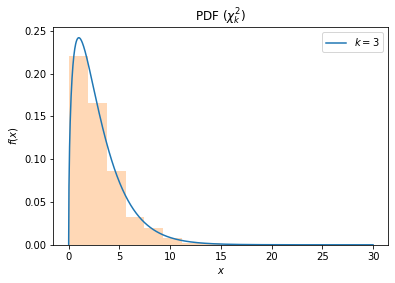

In [94]:
count = 1000 #значение размера выборки объёма 1000 и дальше количество выборок объёма n
x = np.linspace(0,30,count) #генерируем выборку объема 1000 чисел от 0 до 30
k = 3 #степень свободы распределения хи-квадрат
rv = sts.chi2(k) #задаем распределение хи-квадрат
pdf = rv.pdf(x) #плотность распределения функции хи-квадрат
plt.plot(x, pdf, label="$k=%s$" % k) #рисуем плотность распределения функции хи-квадрат
plt.legend()
plt.title("PDF ($\chi^2_k$)")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.hist(rv.rvs(count), density=True, alpha=0.3) #рисуем гистограмму 1000 случайных значений функции хи-квадрат

Считаем и записываем распределение выборочного среднего случайной величины для объёма выборки 5

In [97]:
n = 5 #задаем объем выборки
n5 = [] #пустой массив для средних значений
for i in range(count): #цикл для генерации выборок, расчета их средних и записи средних в массив
    sample5 = rv.rvs(size=n) #генерация выборки
    mean_n5 = sample5.mean() #расчет среднего выборки и записи средних в массив
    n5.append(mean_n5) #добавление среднего в массив

Генерируем выборку объема 1000.
Задаем матожидание равным k и дисперсию - k*2. Значени указаны в следующей статье
https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82

In [98]:
x_norm = np.linspace(-5,12,count) #генерируем выборку объема 1000 чисел от -5 до 12. Значения -5 и 12,чтобы график смотрелся лучше
m_hi2 = k #матожидание распределения хи-квадрат из википедии
d_hi2 = k * 2 #дисперсия распределения хи-квадрат из википедии
std_hi2 = np.sqrt(d_hi2)

Задаем нормальное распределение с матожиданием и дисперсией распределения хи-квадрат

In [99]:
norm_rv = sts.norm(m_hi2, std_hi2/n) #задаем нормальное распределение с матожиданием и дисперсией распределения хи-квадрат
pdf = norm_rv.pdf(x_norm) #плотность нормального распределения

Рисуем гистограмму распределение выборочного среднего случайной величины для объёма выборки n и сверху гистограммы рисуем плотность нормального распределения

(array([0.08898127, 0.27277865, 0.4040625 , 0.31508122, 0.19109093,
        0.10794449, 0.06126579, 0.00875226, 0.00583484, 0.00291742]),
 array([0.82264493, 1.50818244, 2.19371996, 2.87925748, 3.56479499,
        4.25033251, 4.93587003, 5.62140754, 6.30694506, 6.99248258,
        7.67802009]),
 <a list of 10 Patch objects>)

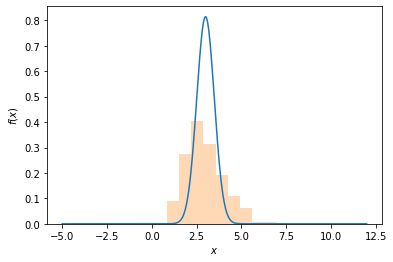

In [100]:
plt.plot(x_norm, pdf) #рисуем плотность нормального распределения 
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.hist(n5, alpha=0.3, density=True) #рисуем гистограмму распределения выборочного среднего случайной величины для объёма выборки 5 (средних из массива)

Считаем и записываем распределение выборочного среднего случайной величины для объёма выборки 10

In [101]:
n = 10 #задаем объем выборки
n10 = [] #пустой массив для средних значений
for i in range(count): #цикл для генерации выборок, расчета их средних и записи средних в массив
    sample10 = rv.rvs(size=n) #генерация выборки объема n
    mean_n10 = sample10.mean() #расчет среднего выборки и записи средних в массив
    n10.append(mean_n10) #добавление среднего в массив

Рисуем гистограмму распределение выборочного среднего случайной величины для объёма выборки 10 и сверху гистограммы рисуем плотность нормального распределения

(array([0.03474081, 0.2043577 , 0.4087154 , 0.54767863, 0.40667182,
        0.26362143, 0.10013527, 0.04087154, 0.02452292, 0.01226146]),
 array([1.14691892, 1.63625698, 2.12559504, 2.61493311, 3.10427117,
        3.59360923, 4.08294729, 4.57228536, 5.06162342, 5.55096148,
        6.04029954]),
 <a list of 10 Patch objects>)

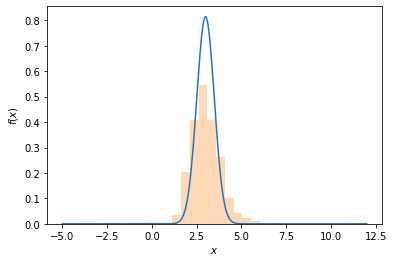

In [102]:
plt.plot(x_norm, pdf) #рисуем плотность нормального распределения 
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.hist(n10, alpha=0.3, density=True) #рисуем гистограмму распределения выборочного среднего случайной величины для объёма выборки 10 (средних из массива)

Считаем и записываем распределение выборочного среднего случайной величины для объёма выборки 25

In [103]:
n = 25 #задаем объем выборки
n25 = [] #пустой массив для средних значений
for i in range(count): #цикл для генерации выборок, расчета их средних и записи средних в массив
    sample25 = rv.rvs(size=n) #генерация выборки объема n
    mean_n25 = sample25.mean() #расчет среднего выборки и записи средних в массив
    n25.append(mean_n25) #добавление среднего в массив

Рисуем гистограмму распределение выборочного среднего случайной величины для объёма выборки 50 и сверху гистограммы рисуем плотность нормального распределения

(array([0.02508797, 0.13798383, 0.45471943, 0.82790296, 0.69305513,
        0.56761529, 0.29164763, 0.08467189, 0.03449596, 0.01881598]),
 array([1.61118353, 1.93006148, 2.24893943, 2.56781738, 2.88669533,
        3.20557328, 3.52445123, 3.84332918, 4.16220713, 4.48108508,
        4.79996303]),
 <a list of 10 Patch objects>)

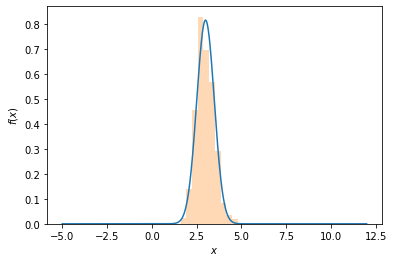

In [104]:
plt.plot(x_norm, pdf) #рисуем плотность нормального распределения 
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.hist(n25, alpha=0.3, density=True) #рисуем гистограмму распределения выборочного среднего случайной величины для объёма выборки 25 (средних из массива)

### Вопрос
Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n

### Ответ

Точность аппроксимации распределения выборочных средних нормальным с ростом n улучшается. Гистограмма приближается к нормальному распределению.Это хорошо видно при объёме выборки 25.